# Clustering - Partitionnement de données
*PASS 2022-2023*

## Sources et Ressources

### Sites web

- [Cours de Gilles Gasso - INSA Rouen](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwju-_X5kPPtAhVDhRoKHf5IBEsQFjACegQIBRAC&url=https%3A%2F%2Fmoodle.insa-rouen.fr%2Fpluginfile.php%2F1319%2Fmod_resource%2Fcontent%2F0%2FParties_1_et_3_DM%2FclusteringBeamer.pdf&usg=AOvVaw2w6-a0-mqnuqQVWRy3Bd2y)
- [Cours wikistat](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
- [Scikit-learn: Clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering)
- [Scikit-learn: K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Scikit-learn: HCA](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
- de nombreuses ressources sont pointées dans le texte du cours vers le site Wikipedia.

### Packages et fonctions

#### Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json


## Introduction

*Le partitionnement de données (ou data clustering en anglais) est une méthode en analyse des données. Elle vise à diviser un ensemble de données en différents « paquets » homogènes, en ce sens que les données de chaque sous-ensemble partagent des caractéristiques communes, qui correspondent le plus souvent à des critères de proximité (similarité informatique) que l'on définit en introduisant des mesures et classes de distance entre objets ([Wikipedia](https://fr.wikipedia.org/wiki/Partitionnement_de_donn%C3%A9es)).*

Autrement dit, cette approche vise à regrouper les données qui sont similaires (selon un critère) et de séparer celles qui sont différentes.
Par exemple, sur la figure ci-dessous:
- à droite un jeu de données,
- à gauche un regroupement des données (indiqué en couleur) en 3 paquets. Il s'agit d'un regroupement possible parmi d'autres.


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


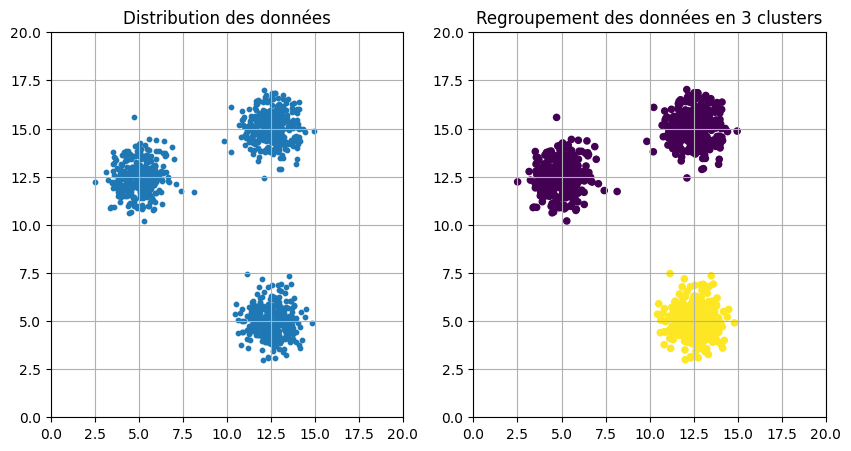

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Définition d'une graine pour le générateur de nombre aléatoire
random_state = 18 # 18 12
std = 0.8
centers = [(5.,12.5),(12.5, 15.),(12.5,5.)]

# Fixe la taille de l'image
plt.figure(figsize=(10, 5))

# Fixe le nombre de points
n_samples = 1000

# créet le nuage de points - i.e. le jeu de données D
D, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=centers, cluster_std= std, center_box= (0.0, 20.0))

# première sous-figure
plt.subplot(121)
plt.xlim(0., 20.)
plt.ylim(0., 20.)
plt.grid()
plt.title("Distribution des données")
plt.scatter(D[:, 0], D[:, 1], s=10)


# Incorrect number of clusters
b = KMeans(n_clusters=2, random_state=random_state).fit_predict(D)


plt.subplot(122)
plt.xlim(0., 20.)
plt.ylim(0., 20.)
plt.grid()
plt.title("Regroupement des données en 3 clusters")
plt.scatter(D[:, 0], D[:, 1], s=20, c=b)

plt.show()

/Users/santini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


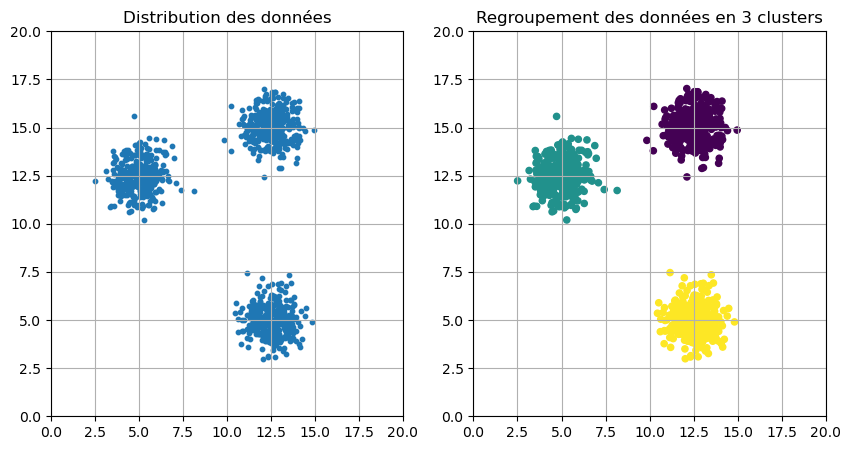

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Définition d'une graine pour le générateur de nombre aléatoire
random_state = 18 # 18 12
std = 0.8
centers = [(5.,12.5),(12.5, 15.),(12.5,5.)]

# Fixe la taille de l'image
plt.figure(figsize=(10, 5))

# Fixe le nombre de points
n_samples = 1000

# créet le nuage de points - i.e. le jeu de données D
D, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=centers, cluster_std= std, center_box= (0.0, 20.0))

# première sous-figure
plt.subplot(121)
plt.xlim(0., 20.)
plt.ylim(0., 20.)
plt.grid()
plt.title("Distribution des données")
plt.scatter(D[:, 0], D[:, 1], s=10)


# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(D)


plt.subplot(122)
plt.xlim(0., 20.)
plt.ylim(0., 20.)
plt.grid()
plt.title("Regroupement des données en 3 clusters")
plt.scatter(D[:, 0], D[:, 1], s=20, c=y_pred)

plt.show()

Dans le cas de l'exemple présenté, la tâche semble simple. L'oeil et le cerveau humain arrivent assez facilement:
1. à identifier qu'il y a 3 paquets de points diférents (donc 3 clusters),
2. à délimiter les contours de chaque cluster.

Cependant, dans de nombreuses situations cette tâche doit être informatisée.
- soit parce que la taille du jeu de données (nombre de points/réalisations) est trop important,
- soit parce que cette tâche fait partie d'un processus automatisé,
- soit parce que la représentation des points n'est pas possible (notament si les points ont plus de 2/3 dimensions). En effet, si le point est défini par $d>3$ attributs, le point de dimension $d$ n'est alors plus représentable sur un écran et donc inaccessible à l'analyse humaine directe.

Il faut alors développer une procédure informatisée s'appuyant sur des bases mathématiques et algorithmiques pour procéder au regroupement des points en classes ou clusters.

L'objectif de ce cours est donc de mettre en place des méthodes de regroupement automatique (clustering). Il s'agira aussi d'introduire des mesures de qualité des regroupements pour évaluer si la procédure automatique donne un résulat satisfaisant (selon des critères à définir).

<span style="color:midnightblue">

<u>**Remarque :**</u>

Les méthodes de clustering font partie des méthodes d'*apprentissage non supervisées* qui regroupent les techniques ayant vocation à découvrir les structures sous-jacentes à des données non étiquetées ([Wikipedia](https://fr.wikipedia.org/wiki/Apprentissage_non_supervis%C3%A9)), qui sont ici les clusters. Ces techniques d'apprentissage se distinguent des techniques d'*apprentissage supervisées* qui consistent à apprendre une fonction de prédiction à partir d'exemples annotés, permettant par exemple d'associer une donnée à une classe - *i.e* un regroupement ([Wikipedia](https://fr.wikipedia.org/wiki/Apprentissage_supervis%C3%A9)).
</span>

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Afin de nous faciliter l'appropriation des outils et techniques nous nous appuierons dans ce cours sur un cas détude:
- Nous nous poserons la question de la formation de groupes de niveaux dans un effectif d'étudiants.
- A l'issu du premier semestre (S1) nous disposons pour chaque étudiant de l'ensemble de ses moyennes au premier semestre.
- Nous nous fixerons comme objectif de regrouper dans les groupes du second semestre (S2) les étudiants ayant un profil similaire et de séparer dans des groupes différents ceux qui ont un profil différent.
</span>

## Les jeux de données, les points et les clusters

### Utilité des définitions

Dans cette partie nous allons nous donner des outils pour réfléchir et comprendre les méthodes proposées.

Dans un premier temps il s'agit de définir ce qu'est une donnée (un *point*) et un regroupement de points (un *cluster*).

Ensuite, comme nous cherchons à regrouper les données similaires et à séparer les données différentes, nous devrons définir ce qui permet de les différencier. Pour cela nous utiliserons les notions de *distance entre points* et de *distance entre clusters*.

Pour finir, afin de d'évaluer la qualité des regroupements trouvés (chaque cluster regroupe-t-il des données similaires et les données des différents clusters sont elles bien différentes), nous introduirons des mesures de qualité des clusters qui pourront être utilisées dans les algorithmes de recherche.

<span style="color:midnightblue">

<u>**Remarque :**</u>

Un regroupement de réalisations ou de points est appelé *cluster*. Il est constitué de un ou plusieurs points.
</span>

<span style="color:midnightblue">

<u>**Remarque :**</u>

L'ensemble des clusters obtenu par un partitionnement des données est appelé *partitionnement* ou *clustering*. Le *partitionnement* est constitué de 1 à plusieurs clusters.
</span>

### Description des données

#### Les réalisations et leur représentation par des points

Une réalisation correspond à une observation. Celle-ci peut être représentée sous la forme d'un point $x$.

Si l'observation est décrite par $d$ mesures ou attributs, alors le point $x_i$ est exprimé dans un espace de dimension $d$.
$$x_i \in \mathbb{R}^d, x_i = \{ \overbrace{x_{i,1}, x_{i,2}, ..., x_{i,d}}^{d\mbox{ attributs}} \}$$

<span style="color:midnightblue">

<u>**Remarque :**</u>

Lors du clustering, regrouper les réalisations qui sont similaires reviendra à regrouper les points qui les représentent.
</span>

<span style="color:midnightblue">

<u>**Remarque :**</u>

Afin de faciliter les explications nous prendrons dans un premier temps des exemples avec $d=2$ qui se prêtent à une représentation sous forme de nuages de points dans un plan 2D, mais tous les concepts et algorithmes présentés ici fonctionnent aussi quel que soit $d>0$.
</span>

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Par exemple si **une réalisation/observation** correspond aux moyennes des 2 UE du S1 d'**un étudiant**, le point qui représente cet étudiant dans les données est:

$$x_i=\{ \overbrace{x_{i,1}, x_{i,2}}^{d=2\mbox{ moyennes}}\}$$
avec
- $x_i$ qui représente l'étudiant $i$
- $x_{i,j}$ la moyenne au S1 de l'étudiant $i$ dans l'UE $j$.
</span>

<span style="color:midnightblue">

<u>**Remarque :**</u>

Dans certains cas, en fonction des opérations que l'on souhaite faire sur les points, certaines notations sont employées, notamment les notations matricielles. Dans ce cours:
- $x_i$ correspond à un vecteur colonne: $x_i= \begin{pmatrix}x_{i,1}\\x_{i,2}\\...\\x_{i,d}\end{pmatrix}$
- $^Tx_i$ correspond à un vecteur ligne:  $^Tx_i= \begin{pmatrix}x_{i,1} & x_{i,2} & ... & x_{i,d}\end{pmatrix}$
</span>

#### Les jeux de données

Un jeu de données $\mathcal{D}$ est consititué d'un ensemble de réalisations/points. On a:

$$\mathcal{D} = \{x_i \in \mathbb{R}^d \}^N_{i=1}$$

où:
- $N$, la cardinalité de $\mathcal{D}$ correspond au nombre de réalisations -**i.e.** au nombre de points de l'ensemble $\mathcal{D}$ -**i.e.** du jeu de données,
- chaque point $x_i$ de $\mathcal{D}$ est défini au moyen de $d$ attributs.

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Dans notre cas d'étude le jeu de données $\mathcal{D}$ représente les
- $N$ étudiants inscrits au S1,
- un point $x_i$ du jeu de données représente un étudiant,
- chaque étudiant $x_i$ est représenté par $d=2$ attributs qui sont les moyennes de ses 2 UE. On a:
    - $x_{i,1}$ correspond à la moyenne de l'étudiant $x_i$ dans l'UE 1 et
    - $x_{i,2}$ correspond à la moyenne de l'étudiant $x_i$ dans l'UE 2.

Ainsi, par exemple, le premier étudiant, représenté par $x_1$ pourrait être décrit de la façon suivante:

$$x_1=\{ \overbrace{x_{1,1},  x_{1,2}}^{d = 2\mbox{ UE}} \}=\{ 12.3,  7.2\}$$

Si on a $N$ étudiants, alors le jeu de donnée $\mathcal{D}$ peut-être représenté par:

$$\mathcal{D}=\{\underbrace{x_1, x_2, ..., x_N}_{N \mbox{ étudiants}}\}$$

soit:

$$\mathcal{D}=\{\underbrace{\{ \overbrace{12.3,  7.2}^{d = 2\mbox{ UE}}\}, \{ 11.6,  9.0\}, \{ 8.3,  17.2\}, ...}_{N \mbox{ étudiants}}\}$$

Lorsque les points d'un jeu de données sont de dimension faible $d<4$, le jeu de données peut être représenté graphiquement sous forme d'un nuage de points dans un plan ($d=2$) ou dans un volume 3D ($d=3$).

Ici chaque étudiant peut donc être représenté par un point en dimension d=2 (2 moyennes/UE):

</span>

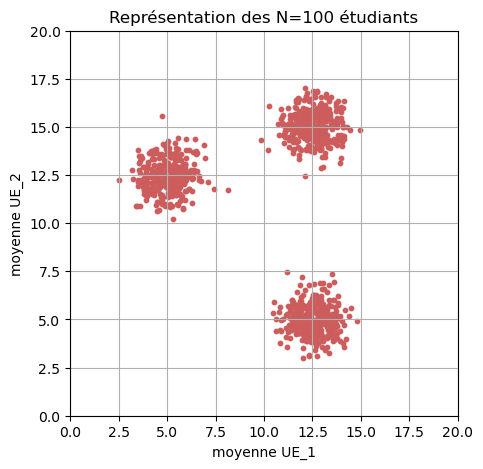

In [8]:
# Fixe la taille de l'image
plt.figure(figsize=(5,5))

# créet les nuages de points
D, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=centers, cluster_std= std, center_box= (0.0, 20.0))

# première sous-figure
plt.title("Représentation des N=100 étudiants")
plt.xlabel("moyenne UE_1")
plt.ylabel("moyenne UE_2")
plt.xlim(0., 20.)
plt.ylim(0., 20.)
plt.grid()
plt.scatter(D[:, 0], D[:, 1], s=10, color="indianred")
plt.show()

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Dimensions des jeux de données et des points
- Exercice TP: Représentation de jeux de données et identification des contours des clusters
</span>

#### Les clusters

L'objectif de ce cours est d'établir des méthodes permettant d'identifier et de regrouper dans des clusters des réalisations similaires.

Un cluster $c_i$ est défini comme un sous-ensemble du jeux de données $\mathcal{D}$:
$$ c_i \subseteq \mathcal{D}$$

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Dans notre cas d'étude si le jeu de données $\mathcal{D}$ est constitué de 7 étudiants, on a :
    $$\mathcal{D}=\{x_1, x_2, x_3, x_4, x_5, x_6, x_7\}$$

Alors,
- $\{x_1, x_3, x_7\}$ pourrait être un cluster,  
- $\{x_1, x_3, x_{10}\}$ pourrait pas être un cluster, 
- $\{\}$ pourrait pas être un cluster,  
- $\{x_1, x_1, x_1\}$ pourrait pas être un cluster 

</span>

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD : Suis-je potentiellement un cluster?
- Exercice TP : Suis-je potentiellement un cluster?
</span>

#### Les partitions non-recouvrantes

Un clustering est une partition non-recouvrante des données en clusters:

$$\mathcal{C}=\{c_0, c_1, ..., c_k\}\text{ avec }k\geq 1\text{ tels que :}$$
$$\forall i,j, c_i\cap c_j=\emptyset$$
$$\bigcup_{i\in[1,k]}c_i=\mathcal{D}$$

Pour qu'un ensemble de cluster $\mathcal{C}=\{c_0, c_1, ..., c_k\}$ puisse être considéré comme un clustering potentiel les clusters $c_i$ de $\mathcal{D}$ doivent donc former une partition non-recouvrante des points (dans le cadre de ce cours on n'étudie que les clustering non recouvrants). Donc :

- L'union des points des différents clusters $c_i$ doit contenir tous les points du jeu de données  $\mathcal{D}$,
- L'union des points des différents clusters $c_i$ ne doit contenir que les points du jeu de données $\mathcal{D}$,
- Un point ne peut appartenir qu'à un seul cluster.

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Dans notre cas d'étude si le jeu de données $\mathcal{D}$ est constitué de 7 étudiants, on a :
    $$\mathcal{D}=\{x_1, x_2, x_3, x_4, x_5, x_6, x_7\}$$
- $\mathcal{C}_1 = \{c_1,c_2,c_3\} = \{\{x_1,x_3,x_7\}, \{x_2, x_6\},\{x_5, x_4\}\}$ est une partition non-recouvrante formée de 3 clusters,
- $\mathcal{C}_2 = \{c_1,c_2\} = \{\{x_1,x_3,x_7\}, \{x_2, x_4, x_5, x_6\}\}$ est une partition non-recouvrante formée de 2 clusters,
- $\mathcal{C}_3 = \{c_1,c_2,c_3\} = \{\{x_1,x_3,x_4,x_7\}, \{x_2\}, \{ x_6\}\}$ n'est pas une partition non-recouvrante.
- $\mathcal{C}_4 = \{c_1,c_2,c_3\} = \{\{x_1,x_3,x_7,x_6\}, \{x_2, x_6\},\{x_5, x_4\}\}$ n'est pas une partition non-recouvrante.
</span>

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Suis-je une partition non-recouvrante?
</span>

### Les distances entre points et entre clusters

#### Pourquoi mesurer des distances

Afin d'opérer des regroupements entre points (étudiants) similaires et séparant les points (étudiants) différents, nous avons besoin d'un moyen de quantifier les ressemblances - *i.e.* les différences entre les réalisations.

Pour cela nous allons utiliser une **mesure de distance** entre les points qui représentent les réalisations.

La procédure de clustering, utilisera cette mesure pour procéder au regroupement des points ou à leur séparation dans les clusters:
- **si la distance entre les 2 points est faible** alors on considère que les réalisations qu'ils représentent, par exemple les étudiants, sont **similaires**. Dans une approche de clustering on cherchera à **regrouper** les points qui sont à de faibles distances.
- **si la distance entre les 2 points est élevée** alors on considère que les réalisations qu'ils représentent, par exemple les étudiants, sont **dissemblables**. Dans une approche de clustering on cherchera à **séparer** les points qui sont à des distances élevées.

La mesure de distance est donc une mésure de dissimilarité:
- Plus la distance entre 2 objets est importante, plus les objets sont dissemblables.
- Plus la distance entre 2 objets est faible, plus les objets sont similaires.

Plusieurs mesures de distance entre points sont utilisables. Nous commencerons par définir ce qu'est une distance puis nous présenterons des mesures usuelles de distance entre points, puis de distance entre clusters.

#### Définition mathématique d'une distance

On appelle distance ([Wikipedia](https://fr.wikipedia.org/wiki/Distance_(math%C3%A9matiques) )) sur un ensemble $E$ toute application $dist$ définie sur le produit $E^2 = E\times E$ et à valeurs dans l'ensemble $\mathbb{R}^+$ des réels positifs ou nuls,
$$dist : E \times E \rightarrow \mathbb{R}^{+}$$

vérifiant les propriétés suivantes :
- Principe de symétrie: $$\forall (a, b) \in E^2, dist( a, b) = dist( b, a)$$
- Principe de séparation: $$\forall (a, b) \in E^2, dist( a, b) = 0 \Leftrightarrow a = b$$
- Principe d'inégalité triangulaire: $$\forall (a, b, c) \in E^3, dist( a, c) \leq dist( a, b) + dist( b, c) $$

<span style="color:midnightblue">

<u>**Remarque :**</u>

Ici la mesure de distance est définie entre les éléments d'un ensemble $E$. Il faut noter que les éléments de cet ensemble peuvent prendre de nombreuses formes. Ainsi:
- si E est un ensemble d'étudiants  $e_i$ alors dist mesure une distance entre étudiants : 
    $$dist(a,b)=dist(e_i, e_j)$$
- si E est un ensemble de points $x_i$ alors dist mesure une distance entre points :
    $$dist(a,b)=dist(x_i, x_j)$$
- si E est un ensemble de groupes d'étudiants  $E_i$ alors dist mesure une distance entre les groupes d'étudiants :
    $$dist(a, b)= dist(E_i, E_j) = dist(\{e_{i,1}, e_{i,2}, \dots, e_{i,n}\}, \{e_{j,1}, e_{j,2}, \dots, e_{j,m}\})$$
- si E est un ensemble de clusters  $c_i$ alors dist mesure une distance entre clusters :
    $$dist(a, b)= dist(c_i, c_j) = dist(\{x_{i,1}, x_{i,2}, \dots, x_{i,n}\}, \{x_{j,1}, x_{j,2}, \dots, x_{j,m}\})$$
</span>

<span style="color:midnightblue">

<u>**Remarque :**</u>

Nous définirons et utiliserons plusieurs mesures de distance dans ce cours. Elles vérifient toutes la définition précédente. 
Si cependant vous souhaitez utiliser les algorithmes de clustering présentés dans ce cours avec d'autres mesures de distance (des mesures que vous définiriez vous-même) rien ne vous en empêche. Ils suffira de vérifier que la mesure que vous définissez vérifie les propriétés de distance données ci-dessus.
</span>

#### Mesures de distance entre points

##### Distance de Minkoswski

La mesure de la distance de Minkoswski est définie par la formule suivant:
Soit deux points définis par $d$ attributs $(x_1, x_2) \in (\mathbb{R}^d)^2$, 
$$dist(x_1,x_2) = \left( \sum_{j=1}^{d} \left| x_{1,j} - x_{2,j} \right|^q  \right)^{\frac{1}{q}}, avec \, en \, général \, q \in \mathbb{N}^*$$

##### Distance Euclidienne</u>
Un cas particulier de la distance de Minkoswski est la distance euclidienne définie pour q=2.

$$dist(x_1,x_2) = \sqrt{
\sum_{j=1}^{d} \left| x_{1,j} - x_{2,j} \right|^2}$$


Si les points $x_i$ sont des points de dimensions $d = 2$, on a alors :

\begin{align}
dist(x_1,x_2) & = \sqrt{\left( \sum_{j=1}^{2} \left| x_{1,j} - x_{2,j} \right|^2  \right)} \\
              & = \sqrt{\left(x_{1,1}-x_{2,1}\right)^2+\left(x_{1,2}-x_{2,2}\right)^2} \\
\end{align}


<span style="color:midnightblue">

<u>**Remarque :**</u>

La distance Euclidienne entre 2 points $x_1$ et $x_2$ est égale à la norme du vecteur $\overrightarrow{x_1x2}$ qui est la racine carrée du carré du produit scalaire $\overrightarrow{x_1x2}$ :

$$dist(x_1,x_2) =\left|x_1x_2\right|=\left|\left|\overrightarrow{x_1x2}\right|\right|=\sqrt{\overrightarrow{x_1x2}.\overrightarrow{x_1x2}}=\sqrt{^T(x_1-x_2).(x_1-x_2)}$$

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Soient 2 étudiants $x_1$ et $x_2$, tels que:
- les moyennes de $x_1$
    - à l'UE 1 est 12./20. et 
    - à l'UE 2 est 7./20.
- les moyennes de $x_2$
    - à l'UE 1 est 10./20. et 
    - à l'UE 2 est 15./20.

Les 2 étudiants peuvent donc être représentés par les points:
- $x_1=\{12., 7.\}$
- $x_2=\{10., 15.\}$

La distance Euclidienne entre l'étudiant $x_1$ et $x_2$ est claculée ainsi:

\begin{align}
dist(x_1, x_2) & = \sqrt{\left( \sum_{j=1}^{2} \left| x_{1,j} - x_{2,j} \right|^2  \right)} = \sqrt{\left(x_{1,1}-x_{2,1}\right)^2+\left(x_{1,2}-x_{2,2}\right)^2}\\
               & = \sqrt{\left(12.-10.\right)^2+\left(7.-15.\right)^2} = \sqrt{\left(2.\right)^2+\left(-8.\right)^2} = \sqrt{4.+64.}  \\
               & = \sqrt{68.} = 2. \sqrt{17.}\simeq 8.25\\
\end{align}


</span>

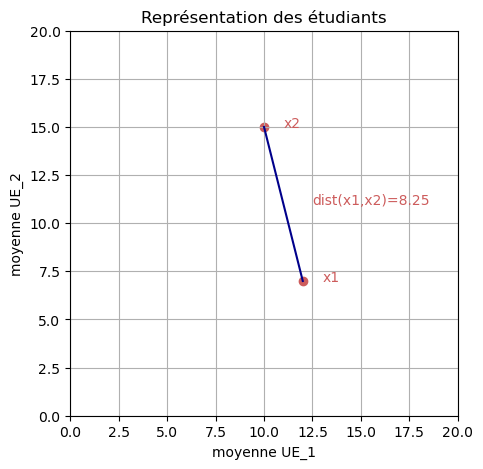

In [9]:
# première sous-figure
D = np.array([[12,7],[10,15]])
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Représentation des étudiants")
ax.set_xlabel("moyenne UE_1")
ax.set_ylabel("moyenne UE_2")
ax.set_xlim(0., 20.)
ax.set_ylim(0., 20.)
ax.grid()
ax.scatter(D[:, 0], D[:, 1], color="indianred")
ax.plot(D[:, 0], D[:, 1], color='darkblue',)
ax.text(D[0,0]+1,D[0,1],"x1", color="indianred")
ax.text(D[1,0]+1,D[1,1],"x2", color="indianred")
ax.text(12.5,11,"dist(x1,x2)="+str(round(np.linalg.norm(D[0]-D[1]),2)), color="indianred")
plt.show()

##### Distance de Manhattan

Un cas particulier de la distance de Minkoswski est la distance de Manhattan définie pour q=1:

$$dist(x_1,x_2) = \sum_{j=1}^{d} \left| x_{1,j} - x_{2,j} \right|$$

Soit pour des points de dimension $d=2$:

$$dist(x_1,x_2) = \sum_{j=1}^{2} \left| x_{1,j} - x_{2,j} \right|=\left|x_{1,1}-x_{2,1}\right|+\left|x_{1,2}-x_{2,2}\right|$$

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Calcul des distances Euclidiennes et de Manhattan 
- Exercice TP: Programmation des distances
- Exercice TP: Trouver le point le plus proche
</span>

In [ ]:
def distMinkowski(x1, x2, q):
    res = 0
    for a, b in x1, x2:
        res += (a - b)**q
    return res**(1/q)

def distEuclidienne(x1, x2): return distMinkowski(x1, x2, 2)

def distManhattan(x1, x2): return distMinkowski(x1, x2, 1)

##### Distance liée à une matrice de pondération : la distance de Mahalanobis

Dans certains cas il peut être important de pondérer les poids associés à chaque attribut dans le calcul de la distance. Dans cette situation il est possible de recourir à une métrique liée à une matrice $W$ qui introduit des pondérations lors du calcul de la distance. On peut alors définirla distance entre 2 points $x_1$ et $x_2$ comme:

$$dist(x_1, x_2) = \sqrt{^T(x_1-x_2).W.(x_1-x2)}$$
avec $W$ une matrice définie positive.

<u>Cas de la distance de Mahalanobis</u> ([Wikipedia](https://fr.wikipedia.org/wiki/Distance_de_Mahalanobis))

Dans le cas de la distance de Mahalanobis, la matrice $W=C^{-1}$ est l'inverse de la matrice $C$ de covariance des données ([Wikipedia](https://fr.wikipedia.org/wiki/Covariance)). On a alors:

$$dist(x_1, x_2) = \sqrt{^T(x_1-x_2).C^{-1}.(x_1-x2)}$$

Elle diffère de la distance euclidienne par le fait qu'elle prend en compte la variance et la corrélation de la série de données.

Ainsi, à la différence de la distance Euclidienne où toutes les composantes des vecteurs sont traitées indépendamment et de la même façon, la distance de Mahalanobis accorde un poids moins important aux composantes les plus dispersées ce qui revient à minimiser l'influence des composantes les plus bruitées (celles ayant la plus grande variance).

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TP: Calcul de la distance de Mahanalobis
</span>

##### Distance entre points à valeurs discrètes

Dans le cas où les valeurs des attributs des réalisations -*i.e.* des valeurs des paramètres des points, sont discrètes, il est possible d'utiliser la <u>distance de Hamming</u> ([Wikipedia](https://fr.wikipedia.org/wiki/Distance_de_Hamming)).

Pour 2 points $x_1$ et $x_2$, la distance de Hamming est égale au nombre de positions où les 2 points diffèrent. Elle peut être définie par la formule suivante:

- Soit un ensemble de valeurs discrètes $A$,
- Soient 2 points $x_1$ et $x_2$ tels que
$$x_i = \{x_{i,1}, x_{i,2}, ..., x_{i,d}\} \mbox{ avec } x_{i,j} \in A$$

La distance de Hamming est définie comme:
$$dist_H(x_1, x_2) = card(\{ j : x_{1,j} \ne x_{1,j}\})$$

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Ici les étudiants $e_i$ ne sont plus décrits par leurs notes mais par leur année de naissance $a_i$, le numéro du département de leur domicile $d_i$, leur mode de transport pour se rendre en cours $t_i$,  leur statut de salarié $s_i$ et de boursier $b_i$. On a :
    $$e_i = \{a_i, d_i, t_i, s_i, b_i\}$$

Soient 2 étudiants :

- L'étudiant $e1$ est né en 2004, habite dans le Val d'Oise, vient en RER, n'est pas salarié et est boursier,

- L'étudiant $e_2$ est né en 2004, habite dans en Seine-Saint-Denis, vient en tramway, est salarié et  boursier.

Les 2 étudiants peuvent être représentés par les vecteurs suivants :

- $e_1 = \{2004, 95, \text{"RER"},False,True\}$
- $e_2 = \{2004, 93, \text{"TRAM"},True,True\}$

La distance de Hamming peut dans ce cas être calculée à la main en comptant le nombre de descripteurs différents :
    
| Etudiant              | $x_{i,1}=a_i$ | $x_{i,2}=d_i$ | $x_{i,3}=t_i$ | $x_{i,4}=s_i$ | $x_{i,4}=b_i$ |
|:--------------------- | --------- | --------- | --------- | --------- | --------- |
| $e_1$                 | 2004     | **95**         | **"RER"**     | **False**         | True         |
| $e_2$                 | 2004     | **93**         | **"TRAM"**     | **True**         | True         |
| $e_{1,j}\ne\ e_{2,j}$ | False  | **True**     | **True**  | **True**     | False     |
| $e_{1,j}\ne\ e_{2,j}$ | 0  | 1     | 1  | 1     | 0     |

Le nombre de positions p où les points diffèrent est de 3 donc: $$dist_H(e_1,e_2) = 3$$
</span>

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Calcul de la distance de Hamming
- Exercice TP: Programmation de la distance de Hamming
</span>

#### Mesures de distance entre clusters

Une approche de classification telle que la *classification ascendante hiérarchique* (CAH) utilise une approche itérative de fusion des clusters les plus similaires (approche agglomérative).

À chaque étape, pour procéder au choix des clusters a fusioner, il est donc nécessaire de pouvoir évaluer la similarité entre chaque paires de clusters pour choisir les 2 clusters les plus similaires et les fusionner.

La mesure de la similarité entre clusters, de la même façon que la mesure de la similarité entre points, est réalisée par le calcul d'une distance (dissimilarité), ici une mesure de distance entre 2 clusters.

Plusieurs mesures de distances entre deux clusters sont utilisables.

Pour les définitions suivantes nous posons :
- $dist( x_1, x_2)$ une mesure de distance en deux points $x_1$, $x_2$,
- $c_1$ et $c_2$ deux clusters de $\mathcal{D}$
- $n_1$ et $n_2$ les cardinalités respectives de $c_1$ et $c_2$
- $\mu_1$ et $\mu_2$ les centres de gravité respectifs de $c_1$ et $c_2$ tels que:

$$\mu_k=\frac{1}{n_k}\sum_{c_k}x_i$$

- <u>SINGLE linkage] Les deux points les plus proches:</u>

La distance SINGLE entre deux clusters est définie comme la plus petite distance entre deux observations appartenant à des clusters différents. Autrement dit, c'est la distance entre les deux points les plus proches des clusters respectifs.

Soit deux clusters $c_N$ et $c_M$, on défini la distance $dist_{SINGLE}$ entre les deux clusters comme étant la distance séparant les deux points les plus proches des deux clusters:
$$dist_{SINGLE}(c_N, c_M) = min\{dist(x_i, x_j)\}_{x_i \in c_N, x_j \in c_M}$$ 
<center>
<img src="./img/figures_distances_clusters_min.png" width=50%>
</center>

Dans cet exemple, les points $x_4$ et $x_5$ sont les deux points les plus proches appartenant aux deux différents clusters $C_1$ et $C_2$.

La distance SINGLE favorise les regroupements où les clusters sont compacts et ont des liens étroits. Cependant, elle est sensible aux effets de chaînage et peut avoir tendance à former des clusters allongés (chaînes) ou des clusters isolés.

- <u>[COMPLETE linkage] Les deux points les plus éloignés:</u>

La distance COMPLETE entre deux clusters est définie comme la plus grande distance entre deux observations appartenant à des clusters différents. Autrement dit, c'est la distance entre les deux points les plus éloignés des clusters respectifs.

Soit deux clusters $c_i$ et $c_j$, on défini la distance $dist_{COMPLETE}$ entre les deux clusters comme étant la distance séparant les deux points les plus éloignés des deux clusters:
$$dist_{COMPLETE}(c_N, c_M) = max\{dist(x_i, x_j)\}_{x_i \in c_N, x_j \in c_M}$$ 
<center>
<img src="./img/figures_distances_clusters_max.png" width=50%>
</center>

Dans cet exemple, les points $x_2$ et $x_6$ sont les deux points les plus proches appartenant aux deux différents clusters $C_1$ et $C_2$.

L'effet de la distance COMPLETE est de favoriser les regroupements où les clusters sont compacts et où la distance maximale entre les observations des clusters est minimale. Elle a tendance à former des clusters bien séparés et compacts, où les observations à l'intérieur de chaque cluster sont similaires entre elles.

Cependant, la distance COMPLETE peut également être sensible aux valeurs aberrantes (outliers) ou aux bruits dans les données. Si un seul point aberrant est présent dans un cluster, cela peut avoir un impact important sur la distance entre les clusters, conduisant potentiellement à des regroupements inappropriés.

- <u>[AVERAGE] Moyenne des distances</u>

La distance AVERAGE entre deux clusters est définie comme la moyenne des distances entre toutes les paires d'observations appartenant aux deux clusters. 

$$dist_{AVERAGE}(C_N, C_M) = \frac{\sum_{x_i\in c_N}\sum_{x_j\in c_M}dist(x_i, x_j)}{n_N n_M}$$
<center>
<img src="./img/figures_distances_clusters_moy.png" width=50%>
</center>

L'effet de la distance AVERAGE est de favoriser les regroupements où les clusters sont compacts et où la distance moyenne entre les observations des clusters est minimale. Elle tente de trouver un compromis entre la distance SINGLE (qui privilégie les regroupements compacts mais sensibles aux effets de chaînage) et la distance COMPLETE (qui privilégie les regroupements compacts mais sensibles aux valeurs aberrantes).

La distance AVERAGE est souvent considérée comme plus robuste que la distance COMPLETE, car elle est moins sensible aux valeurs aberrantes ou aux bruits dans les données. Elle peut être utilisée lorsque vous recherchez des regroupements compacts mais qui peuvent tolérer certains degrés de dissimilarité entre les observations.

- <u>[WARD] La distance de Ward:</u>

$$dist_{WARD}(C_1, C_2) = \sqrt{\frac{n_1 n2}{n_1+n_2}}dist(\mu_1,\mu_2)$$
<center>
<img src="./img/figures_distances_clusters_Ward.png" width=50%>
</center>

La distance de WARD favorise les regroupements où les clusters sont compacts et ont une variance minimale. Elle cherche à minimiser la variation intra-cluster tout en maximisant la séparation entre les clusters.

L'utilisation de la distance de Ward peut être appropriée lorsque vous souhaitez former des clusters compacts et homogènes, avec une variance minimale.

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Calcul de distances inter-clusters
- Exercice TP: Programmation des distances inter-clusters
</span>

### Caractérisation des clusters

##### Centre de gravité d'un cluster

Le centre de gravité $\mu_k$ d'un cluster $C_k$ est calculé comme le barycentre des points qui composent le cluster:
$$\mu_k=\frac{1}{n_k}\sum_{Ck}x_i$$

##### Inertie intra-cluster

L'inertie $J_k$ mesure la dispersion des points du cluster $C_k$ autour de son centre de gravité $\mu_k$:

$$J_k=\sum_{x\in C_k}dist^2(x,\mu_k)$$

- Plus l'inertie $J_k$ est grande, plus les points de $C_k$ sont dispersés (autour de $\mu_k$).
- Plus l'inertie $J_k$ est faible, plus les points de $C_k$ sont concentrés (autour de $\mu_k$).

<img src="img/figure_inertie.png" width=50%>

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Calcul de l'inertie intra-cluster
- Exercice TP: Programmation et calcul de l'inertie intra-cluster
</span>

### Caractérisation des partitions (clustering)

#### Définition d'une partition (clustering non recouvrant)

La partition $\mathcal{C}$ d'un jeu de données $\mathcal{D}$ est définie comme un ensemble de clusters couvrant l'ensemble des points de $\mathcal{D}$. $\mathcal{C}$ est une partition non recouvrante si et seulement si:
- $\forall (C_i, C_j) \in \mathcal{C}^2, C_i \cap C_j = \emptyset$
- $\bigcup_{C_i \in \mathcal{C}} C_i = \mathcal{D}$
- $\emptyset \notin \mathcal{C}$

<span style="color:indianred">

<u>***Cas d'étude:***</u>

Soit un jeu de données $\mathcal{D}$ contenant 6 étudiants $\{x_i\}_{i \in 1..6}$.

- une partition $\mathcal{C}^1$ en 3 clusters pourrait être:
$$\mathcal{C}^1=\{c^1_1, c^1_2, c^1_3\} = \{\{x_1, x_3, x_4\},\{x_2\},\{x_5,x_6\}\}$$
- une partition $\mathcal{C}^2$ en 2 clusters pourrait être:
$$\mathcal{C}^2=\{c^1_1, c^1_2\} = \{\{x_1, x_2, x_3\},\{x_4, x_5,x_6\}\}$$

</span>

#### Inertie intra-classe d'une partition

L'inertie intra-classe d'une partition $\mathcal{C}$ mesure la concentration des points de chaque cluster autour de leur centre de gravité. Elle est calculée comme la somme des inerties des clusters :

\begin{align}
J_{W} & = \sum_{C_k \in \mathcal{C}} J_k\\
    & = \sum_{C_k \in \mathcal{C}} \sum_{x\in C_k}dist^2(x,\mu_k)
\end{align}

- $J_W$ est faible si les clusters regoupent des points très concentrés.
- $J_W$ est important si les clusters regoupent des points éloignés. 

<img src="img/figure_inertie_intra.png">

#### Inertie inter-classes d'une partition

L'inertie inter-cluster mesure l'éloignement des centres des clusters entre eux. Elle est calculée comme l'inertie des centres des clusters:

Soit:
- $\mu_k$ les centres de gravité des $k$ clusters,
- $\mu$ le centre de gravité des $\mu_k$, avec:

$$\mu=\frac{1}{N_k}\sum_{k=1}^{N_k}\mu_k$$

On a:

$$J_{b}=\sum_{k}n_kdist^2(\mu_k,\mu)$$
 
<img src="img/figure_inertie_inter.png">

#### Inertie totale d'une partition

L'inertie totale d'une partition $\mathcal{C}$ est calculée comme la somme des inerties intra et inter classe:

\begin{align}
    J & = J_{W} & + & J_{b} \\
    & = \sum_{C_k \in \mathcal{C}} \sum_{x\in C_k}dist^2(x,\mu_k) & + & \sum_{k}n_kdist^2(\mu_k,\mu)
\end{align}

#### Qu'est-ce qu'une bonne partition ?

La recherche d'une bonne partition peut-être concue comme une forme d'optimisation consistant à:
- minimiser l'inertie intra-classe - *i.e.* à l'intérieur des clusters les points sont fortement regroupés,
- maximiser l'inertie inter-classe - *i.e.* les clusters sont bien séparés les uns des autres.

Cependant, cette optimisation est complexe car les inerties intra- et inter-clusters ne sont pas indépendantes.

<span style="color:darkgreen">
    
<u>**Exercice(s) :**</u>

- Exercice TD: Calcul de l'inertie d'une partition
- Exercice TP: Programmation et calcul de l'inertie d'une partition
</span>